In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [3]:
irravgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_irr_0.1Wm2_1x1_ensAvg_1950_2100.nc'
ds_irrAvg = xr.open_dataset(irravgpath).rename({'XT_OCEAN':'xt_ocean', 'YT_OCEAN':'yt_ocean', 'TIME':'time'})

In [4]:
# Load the area data
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':ds_irrAvg['xt_ocean'],'yt_ocean':ds_irrAvg['yt_ocean']})

In [30]:
def year_comp(plot, minLat, maxLat, cont1, cont2, cont3):
    
    years = np.arange(1990, 2110, 10)
    colors = ['khaki','limegreen','orange','teal','mediumpurple','slategray','indigo','palegreen','turquoise','pink','navy']
    colorblue = ['turquoise','darkcyan','powderblue','deepskyblue','royalblue','navy','slategray','blue']
    colortab = ['tab:blue','tab:orange','tab:green','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','pink','navy','darkgreen']
    
    ds_lim = ds_irrAvg.sel(yt_ocean=slice(minLat,maxLat))
    oceanmask = np.isfinite(ds_z0avg['MI'].sel(time='1950-01-16',yt_ocean=slice(minLat,maxLat)).squeeze())
    area_lim = area.sel(yt_ocean=slice(minLat,maxLat))
    area_masked = area_lim.where(oceanmask,np.nan)
    
    i = 0
    for year in years:
        ds_year = ds_lim.sel(time=slice(str(year)+'-01-01',str(year)+'-12-31'))
        mean_year = (ds_year['MI']*area_masked).sum(['xt_ocean','yt_ocean'])/(area_masked.sum(['xt_ocean','yt_ocean']))
        plot.plot(np.unique(mean_year['time.month']),mean_year.groupby('time.month').mean(),color=colortab[i],label=str(year))
        i += 1
    plot.legend()
    if cont1 == True:
        plot.axhline(y=1.0, xmin=0,xmax=1,color='red',dashes=[6,2])
    if cont2 == True:
        plot.axhline(y=2.0, xmin=0,xmax=1,color='orange',dashes=[6,2])
    if cont3 == True:
        plot.axhline(y=3.0, xmin=0,xmax=1,color='yellow',dashes=[6,2])
    plot.set_ylabel('metabolic index')
    plot.set_xlabel('month')
    plot.set_title('Mean Metabolic Index, '+str(minLat)+ ' to '+str(maxLat)+ ', by Year, irr0.1')

(7.5, 22.0)

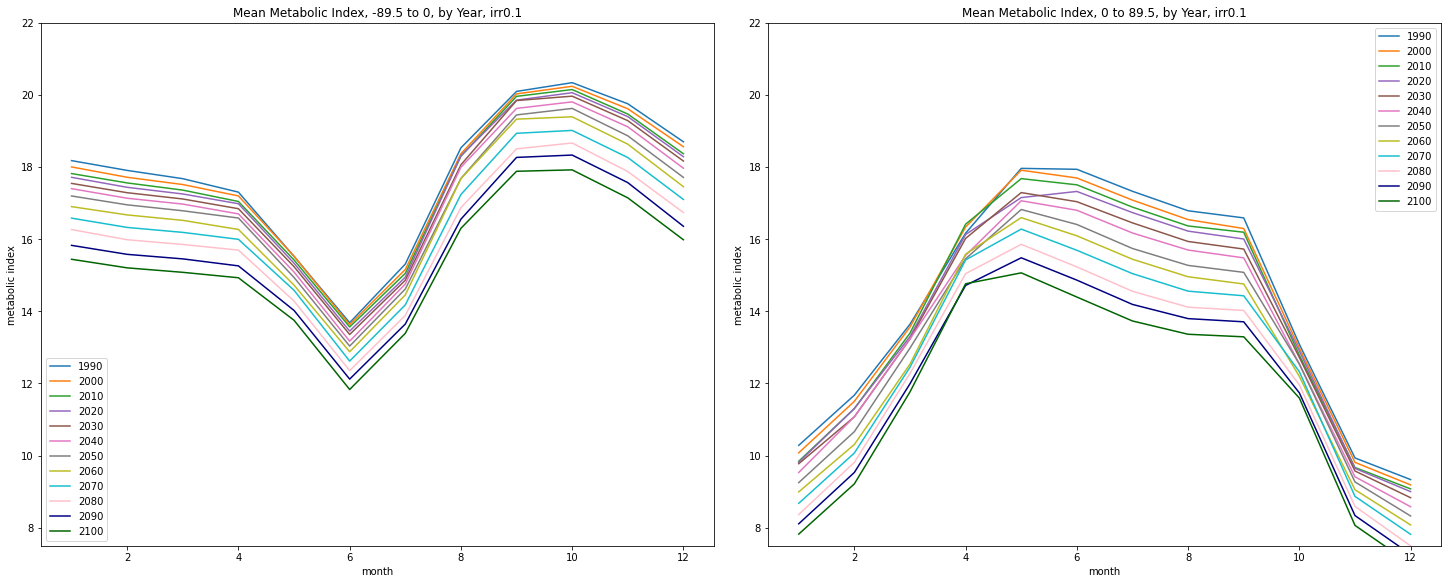

In [11]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -89.5, 0, False, False, False)
ax0.set_ylim(7.5,22)
year_comp(ax1, 0, 89.5, False, False, False)
ax1.set_ylim(7.5,22)

(5.0, 9.0)

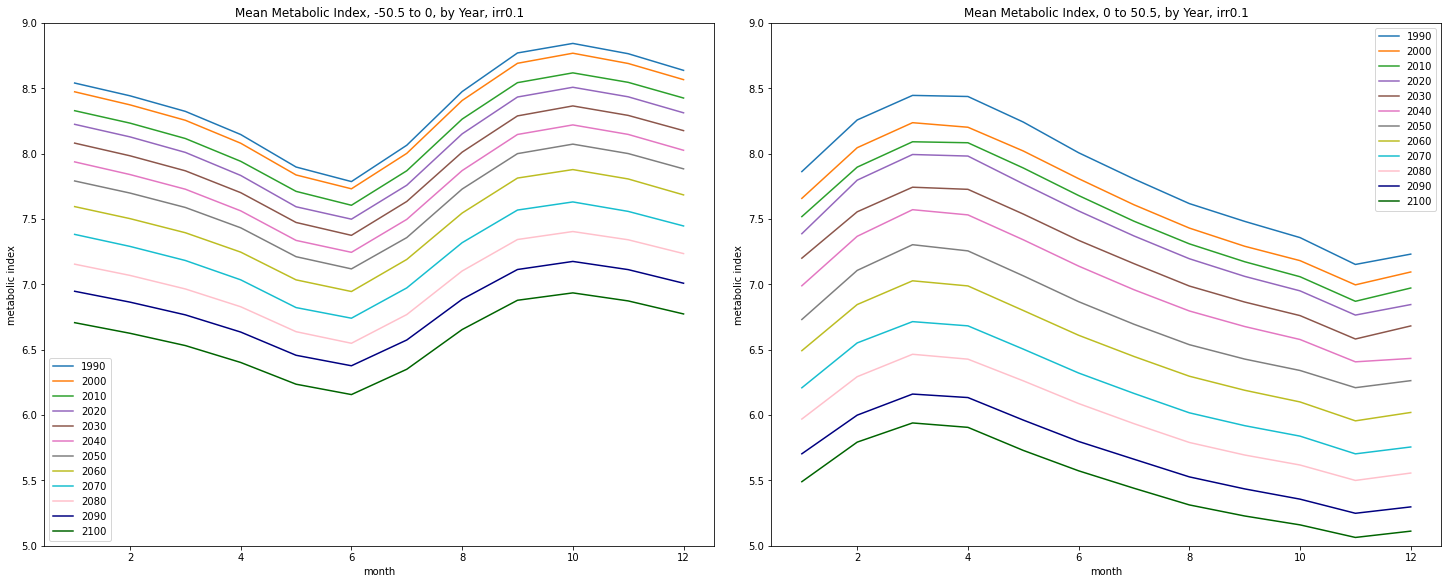

In [14]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -50.5, 0, False, False, False)
ax0.set_ylim(5,9)
year_comp(ax1, 0, 50.5, False, False, False)
ax1.set_ylim(5,9)

(2.5, 4.0)

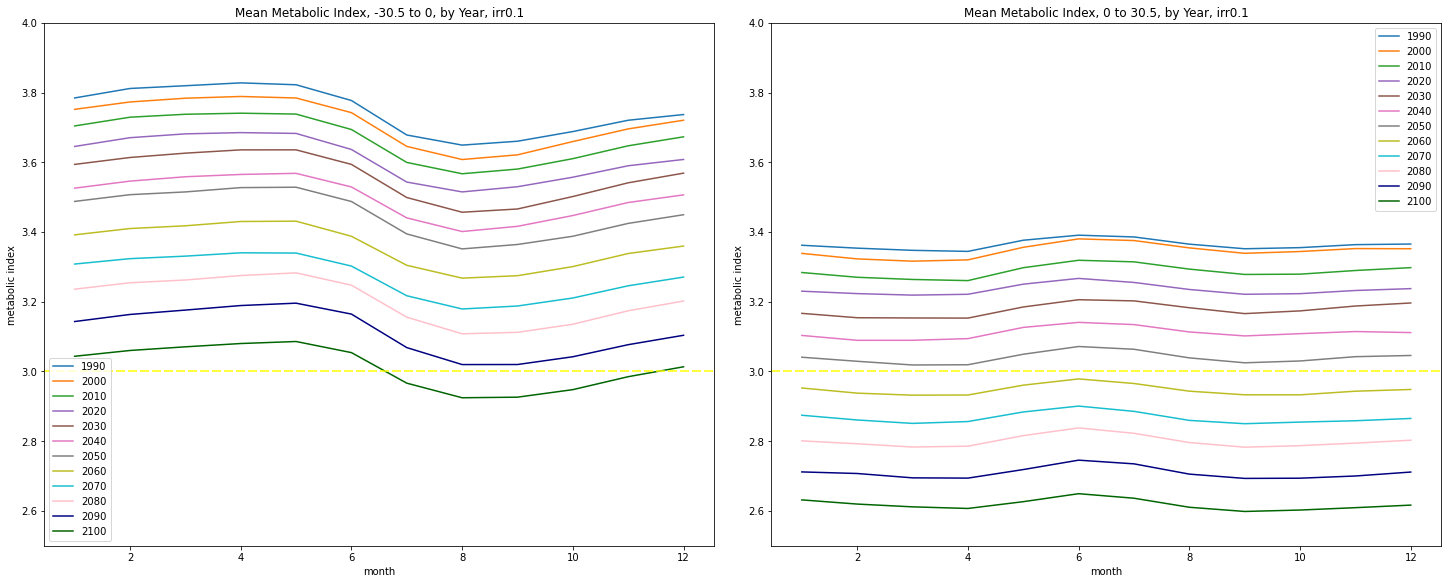

In [32]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -30.5, 0, True, True, True)
ax0.set_ylim(2.5,4)
year_comp(ax1, 0, 30.5, True, True, True)
ax1.set_ylim(2.5,4)

(1.8, 3.2)

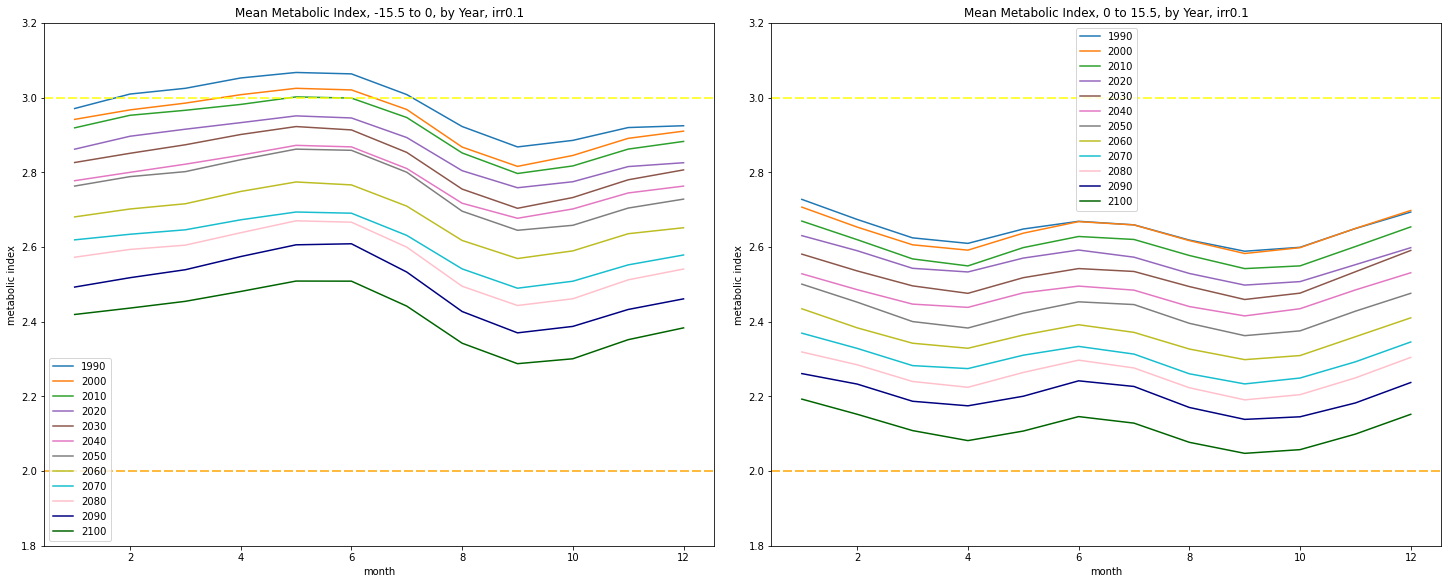

In [17]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -15.5, 0, False, True, True)
ax0.set_ylim(1.8,3.2)
year_comp(ax1, 0, 15.5, False, True, True)
ax1.set_ylim(1.8,3.2)

In [18]:
k11avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k11_ensAvg_1x1_1950_2100.nc'
ds_k11Avg = xr.open_dataset(k11avgpath)

(11.0, 19.0)

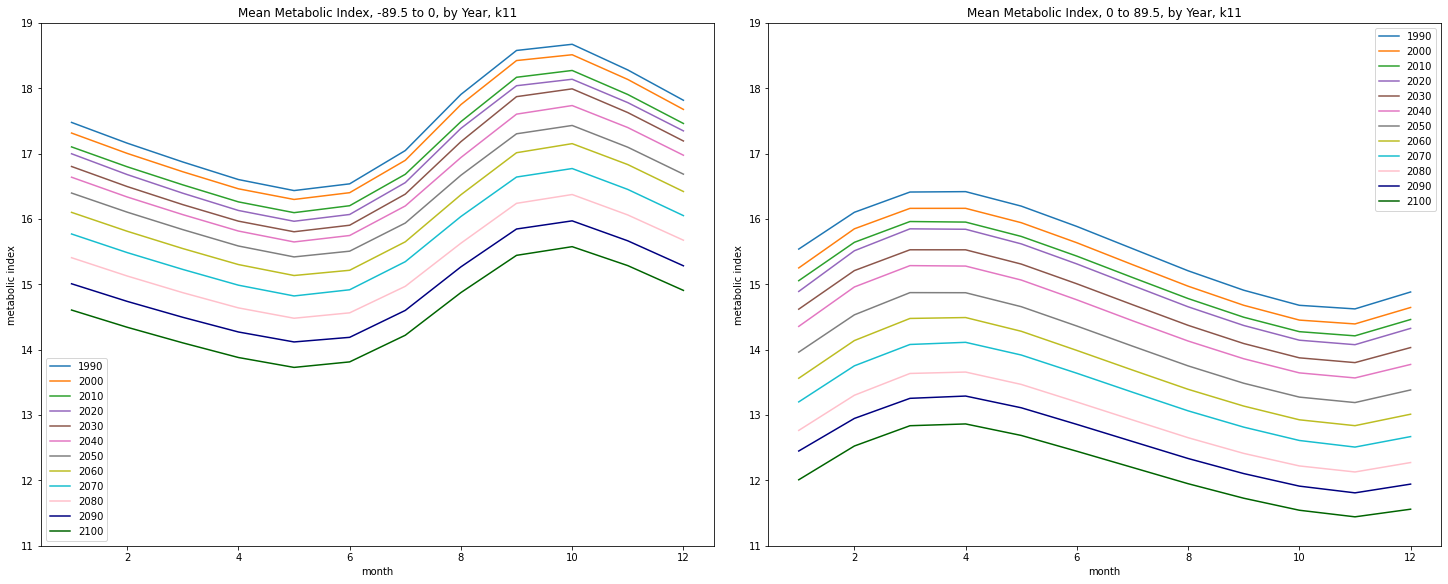

In [22]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -89.5, 0, False, False, False)
ax0.set_ylim(11,19)
year_comp(ax1, 0, 89.5, False, False, False)
ax1.set_ylim(11,19)

(4.5, 9.0)

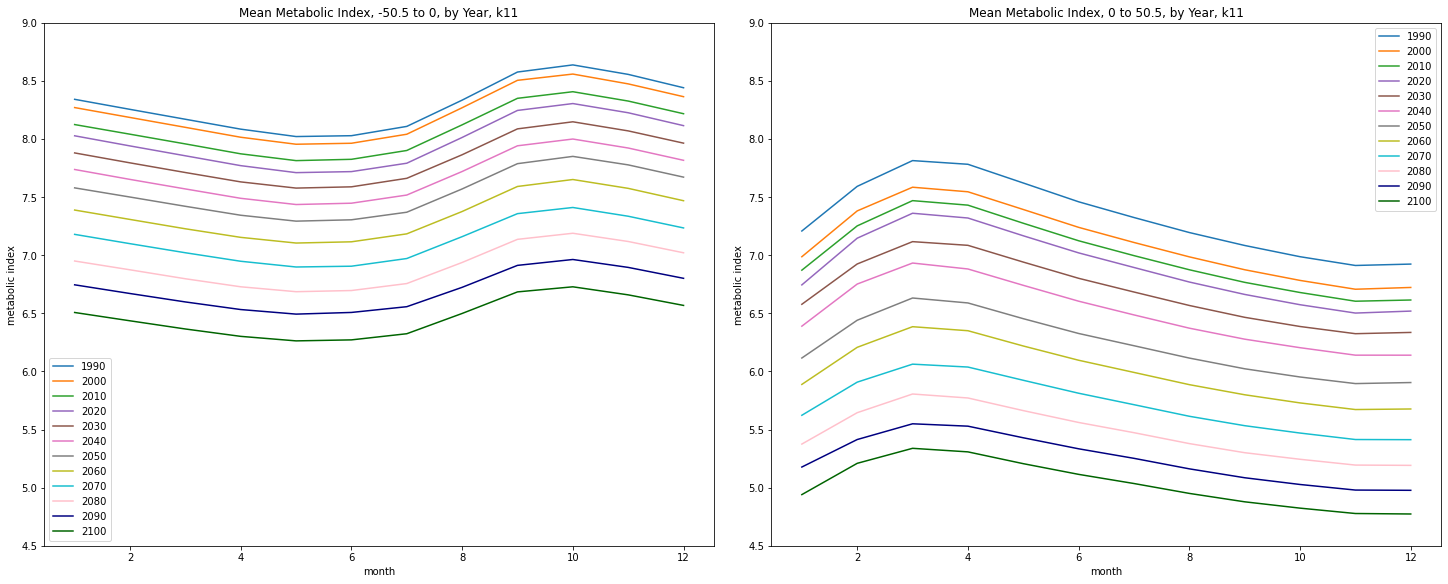

In [24]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -50.5, 0, False, False, False)
ax0.set_ylim(4.5,9)
year_comp(ax1, 0, 50.5, False, False, False)
ax1.set_ylim(4.5,9)

(2.2, 4.0)

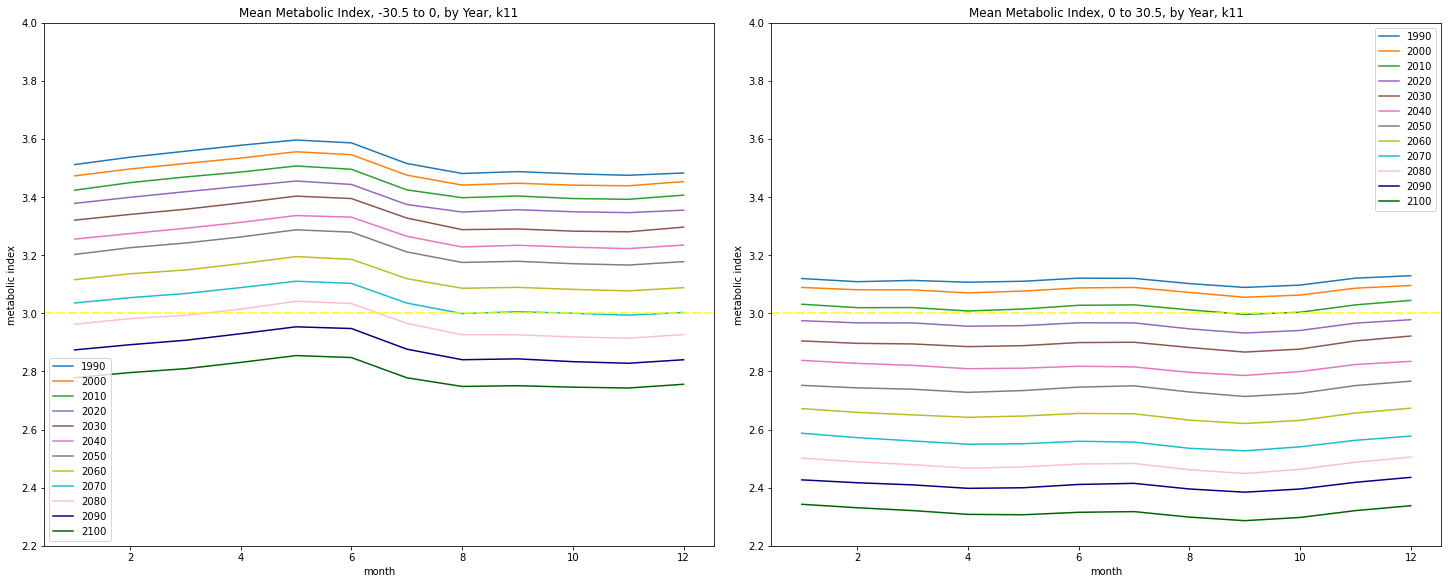

In [27]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -30.5, 0, False, False, True)
ax0.set_ylim(2.2,4)
year_comp(ax1, 0, 30.5, False, False, True)
ax1.set_ylim(2.2,4)

(1.7, 3.2)

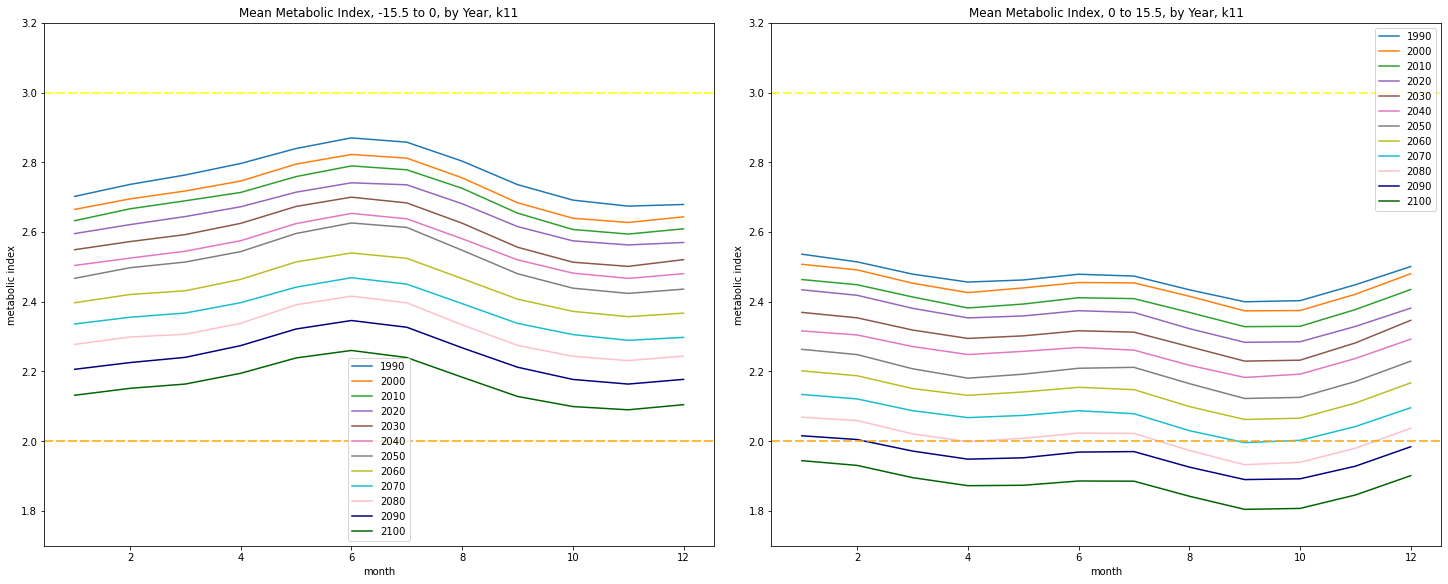

In [29]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -15.5, 0, False, True, True)
ax0.set_ylim(1.7,3.2)
year_comp(ax1, 0, 15.5, False, True, True)
ax1.set_ylim(1.7,3.2)